In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pods
import GPy

%matplotlib inline

/home/ssci/anaconda/lib/python2.7/site-packages/GPy/util/linalg.py:48: UserWarning: warning: caught this exception:/home/ssci/anaconda/lib/python2.7/site-packages/numpy/core/_dotblas.so: undefined symbol: dsyrk_
  warnings.warn("warning: caught this exception:" + str(e))


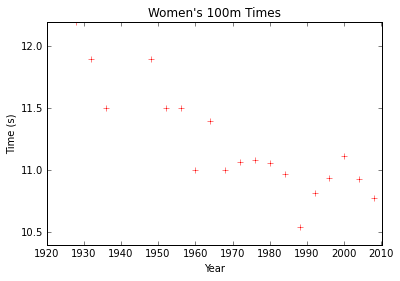

In [11]:
data = pods.datasets.olympic_100m_women()
x, y = data['X'], data['Y']
plt.plot(x,y,'r+')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

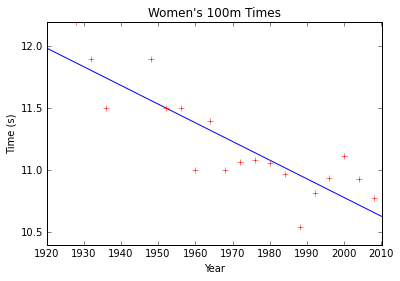

In [3]:

p = np.polyfit(x,y,1)
testx = np.linspace(1920,2010,100)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
plt.plot(x,y,'r+')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

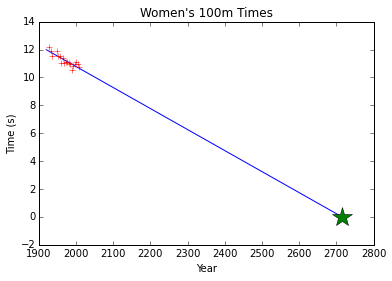

In [4]:
r = np.roots(p)
testx = np.linspace(1920,r+10,200)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
plt.plot(x,y,'r+')
plt.plot(r,0,'g*',markersize=20)
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

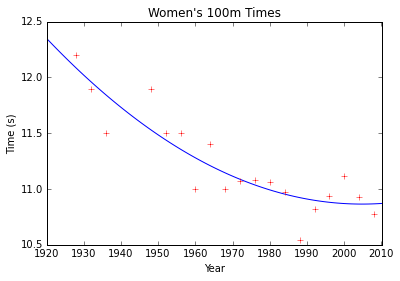

In [5]:
p = np.polyfit(x,y,2)
testx = np.linspace(1920,2010,100)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
plt.plot(x,y,'r+')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

114.958853555


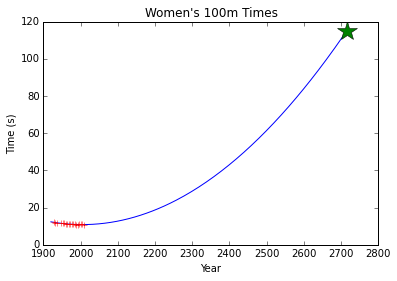

In [6]:
p = np.polyfit(x,y,2)
testx = np.linspace(1920,2720,200)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
plt.plot(x,y,'r+')
p2715 = np.polyval(p,2715)
print p2715
plt.plot(2715,p2715,'g*',markersize=20)
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

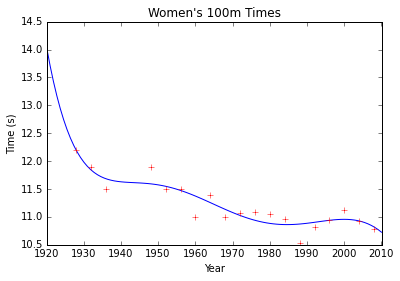

In [7]:
p = np.polyfit(x,y,6)
testx = np.linspace(1920,2010,100)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
plt.plot(x,y,'r+')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

0.732605871424


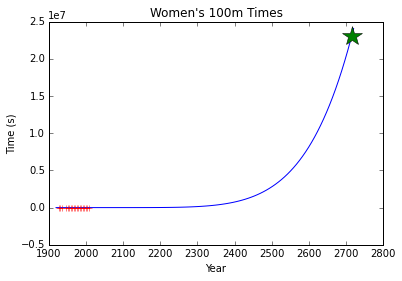

In [8]:
p = np.polyfit(x,y,6)
testx = np.linspace(1920,2720,100)
pred = np.polyval(p,testx)
plt.plot(testx,pred,'b-')
p2715 = np.polyval(p,2715)
print p2715 / (60*60*24*365)
plt.plot(2715,p2715,'g*',markersize=20)
plt.plot(x,y,'r+')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title("Women's 100m Times")

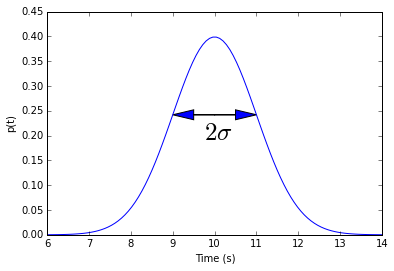

In [9]:
import matplotlib.mlab as mlab
xn = np.linspace(6,14,100)
yval = mlab.normpdf(9,10,1)

plt.plot(xn,mlab.normpdf(xn,10,1))
plt.arrow(10,yval,-0.5,0, head_length=0.5)
plt.arrow(10,yval,0.5,0, head_length=0.5)
plt.annotate(r'$2\sigma$',(9.75,yval - 0.05),fontsize=25)
plt.ylim([0,0.45])
plt.xlabel('Time (s)')
plt.ylabel('p(t)')

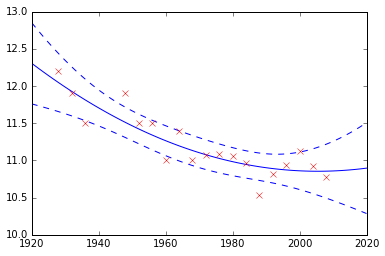

In [24]:
def polynomial(x, degree, loc, scale):
    degrees = np.arange(degree+1)
    return ((x-loc)/scale)**degrees

scale = np.max(x) - np.min(x) 
loc = np.min(x) + 0.5*scale
 
degree = 2
alpha = 4.
sigma2 = 0.1


num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1920, 2020, num_pred_data)[:, None]
Phi = polynomial(x, degree, loc, scale)
Phi_pred = polynomial(x_pred, degree, loc, scale)

# compute the posterior covariance and mean
w_cov = np.linalg.inv(1/sigma2*np.dot(Phi.T, Phi) + 1/alpha*np.eye(degree+1))
w_mean = np.dot(w_cov, 1/sigma2*np.dot(Phi.T, y))

f_pred_mean = np.dot(Phi_pred, w_mean)
# compute the error bars
f_pred_cov = np.dot(Phi_pred, np.dot(w_cov, Phi_pred.T))
f_pred_var = np.diag(f_pred_cov)[:, None]
f_pred_std = np.sqrt(f_pred_var)

# plot mean, and error bars at 2 standard deviations
plt.plot(x_pred.flatten(), f_pred_mean.flatten(), 'b-')
plt.plot(x_pred.flatten(), (f_pred_mean+2*f_pred_std).flatten(), 'b--')
plt.plot(x_pred.flatten(), (f_pred_mean-2*f_pred_std).flatten(), 'b--')
plt.plot(x, y, 'rx')




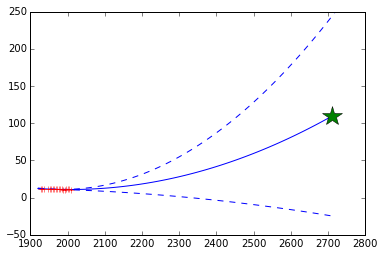

In [39]:
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1920, 2720, num_pred_data)[:, None]
Phi = polynomial(x, degree, loc, scale)
Phi_pred = polynomial(x_pred, degree, loc, scale)

# compute the posterior covariance and mean
w_cov = np.linalg.inv(1/sigma2*np.dot(Phi.T, Phi) + 1/alpha*np.eye(degree+1))
w_mean = np.dot(w_cov, 1/sigma2*np.dot(Phi.T, y))

f_pred_mean = np.dot(Phi_pred, w_mean)
# compute the error bars
f_pred_cov = np.dot(Phi_pred, np.dot(w_cov, Phi_pred.T))
f_pred_var = np.diag(f_pred_cov)[:, None]
f_pred_std = np.sqrt(f_pred_var)

# plot mean, and error bars at 2 standard deviations
plt.plot(x_pred.flatten(), f_pred_mean.flatten(), 'b-')
plt.plot(x_pred.flatten(), (f_pred_mean+2*f_pred_std).flatten(), 'b--')
plt.plot(x_pred.flatten(), (f_pred_mean-2*f_pred_std).flatten(), 'b--')
plt.plot(x, y, 'r+')

plt.plot(x_pred[-2], f_pred_mean[-2], 'g*', markersize=20)



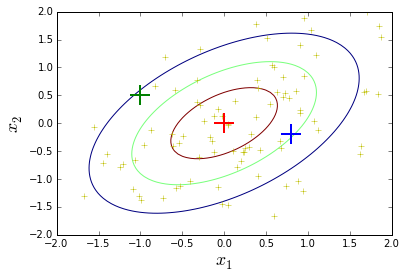

In [86]:
import GPy
import matplotlib.mlab as mlab

mu = np.array([0, 0])
sig = np.array([[1, 0.5],[0.5, 1]])

x = np.arange(-2,2,0.05)
y = np.arange(-2,2,0.05)
X, Y = np.meshgrid(x,y)

Z = mlab.bivariate_normal(X,Y,1.0,1.0,0.,0.,0.5)

plt.contour(X,Y,Z,3)

f = np.random.multivariate_normal(mu, sig, 100)
plt.plot(f[:,0],f[:,1],'y+')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'$x_1$',fontsize=18)
plt.ylabel(r'$x_2$',fontsize=18)

plt.plot(0,0,'r+',markersize=20,markeredgewidth=2)
plt.plot(-1,0.5,'g+',markersize=20,markeredgewidth=2)
plt.plot(0.8,-0.2,'b+',markersize=20,markeredgewidth=2)

([<matplotlib.axis.XTick at 0x7f4f0c593c50>,
 <a list of 2 Text xticklabel objects>)

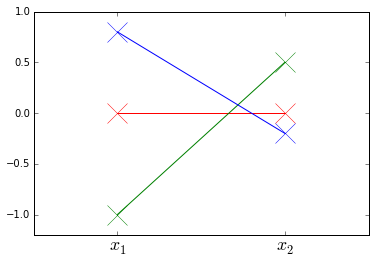

In [87]:
xs = np.array([1,2])
y1 = np.array([0,0])
y2 = np.array([-1,0.5])
y3 = np.array([0.8,-0.2])

plt.xlim([0.5,2.5])
plt.ylim([-1.2, 1])
plt.plot(xs,y1,'rx-',markersize=20)
plt.plot(xs,y2,'gx-',markersize=20)
plt.plot(xs,y3,'bx-',markersize=20)
plt.xticks(xs,(r'$x_1$',r'$x_2$'),fontsize=18)

(0, 9)

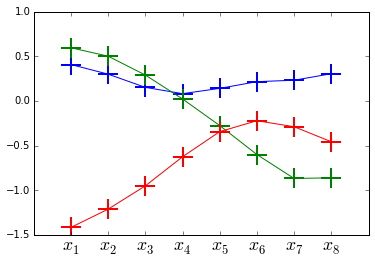

In [114]:
def sample(cov, X, n):
    K = cov.K(X)
    F = np.random.multivariate_normal(np.zeros(X.shape[0]), K, n)
    plt.plot(X,F.T,'+-',markersize=20,markeredgewidth=2)
    
cov = GPy.kern.RBF(input_dim=1,variance=0.5, lengthscale = 2.5)

X = np.arange(1,9)[:,None]
sample(cov,X,3)

plt.xticks(np.arange(1,9),[r'$x_%d$' % i for i in range(1,9)],fontsize=18)
plt.xlim([0,9])
    

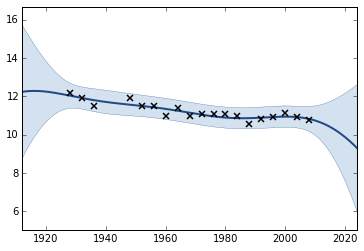

In [158]:
data = pods.datasets.olympic_100m_women()
x, y = data['X'], data['Y']

k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(x, y, k)

m.constrain_positive('.*')
m.optimize()
m.plot()
    
from IPython.display import  display
display(m)

{'dataplot': [<matplotlib.lines.Line2D at 0x7f4f099eecd0>],
 'gpplot': [[<matplotlib.lines.Line2D at 0x7f4f099e0890>],
  [<matplotlib.lines.Line2D at 0x7f4f099ee690>]]}

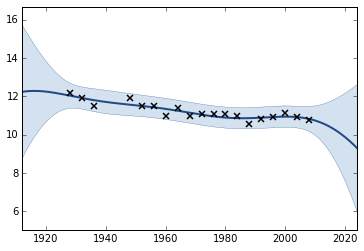

In [174]:
import GPy
import pods

data = pods.datasets.olympic_100m_women()
x, y = data['X'], data['Y']

k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(x, y, k)

m.constrain_positive('.*')
m.optimize()
m.plot()

In [176]:


def sample_covariance(kern, X, num_samps=10):
    """Sample a one dimensional function as if its from a Gaussian process with the given covariance function."""
    K = kern.K(X) 

    # Generate samples paths from a Gaussian with zero mean and covariance K
    F = np.random.multivariate_normal(np.zeros(X.shape[0]), K, num_samps).T

    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(X,F)



 /home/ssci/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning:covariance is not positive-semidefinite.


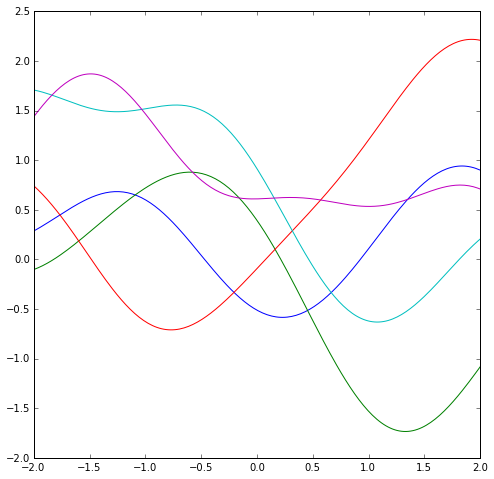

In [179]:
# create an input vector
X = np.linspace(-2, 2, 200)[:, None]

# create a covariance to visualize
kern = GPy.kern.RBF(input_dim=1)

# perform the samples.
sample_covariance(kern, X, 5)

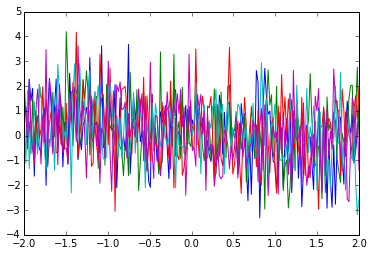

In [188]:
x = np.array([-1.5, -0.75, 0, 0.75, 1.5])[:,None]
y = np.array([1.2, 0.65, 0, 0.15, -0.5])[:,None]

model = GPy.models.GPRegression(x, y, kern)

nsamples = 5
samps = model.posterior_samples(X, 5)

for i in range(nsamples):
    plt.plot(X,samps[:,i])